In [1]:
import pandas as pd
import numpy as np  
from datetime import datetime 
from functions.Team_Augury_load_transform_saved import load_and_preprocess
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
import pickle
import matplotlib.pyplot as plt
from matplotlib.pyplot import cla, figure
import altair as alt
from altair_saver import save
from sklearn.inspection import permutation_importance


In [2]:
X_train, y_train = load_and_preprocess()
print ('Testing load, length of X, y:', X_train.shape, y_train.shape)
print ('type', type(X_train))

Loading features...
data loaded and pre_processed
Testing load, length of X, y: (1674, 776) (1674,)
type <class 'pandas.core.frame.DataFrame'>


In [3]:
#load pkl'd SVC clf
filename = "models/SVC_vanilla_model.sav" #note this is the 'Vanillia model', not the optimised tuned one, assume kernel = rbf
SVC_loaded = pickle.load(open(filename, 'rb'))

#test load
result = SVC_loaded.score(X_train, y_train)
print('Testing model load: Accuracy result for GBT:' , result)

Testing model load: Accuracy result for GBT: 0.9097968936678614


In [4]:
#Get perm/feature importances ## NB THIS TOOK 88 mins, so written to pkl for future uses 
# perm_importance = permutation_importance(SVC_loaded, X_train, y_train)
# print (len(perm_importance))

3


In [8]:
filename = "models/SVM_feat_imp_bunch_object_vanilla_model.sav"
#pickle.dump(perm_importance, open(filename, 'wb')) #the code to dump it
perm_importance = pickle.load(open(filename, 'rb')) #the code to load it

In [9]:
type(perm_importance)

sklearn.utils.Bunch

In [16]:
sorted_idx = perm_importance.importances_mean.argsort()

In [18]:
len(sorted_idx)

776

In [19]:
len(X_train.columns)

776

In [20]:
features = np.array(list(X_train.columns.values))

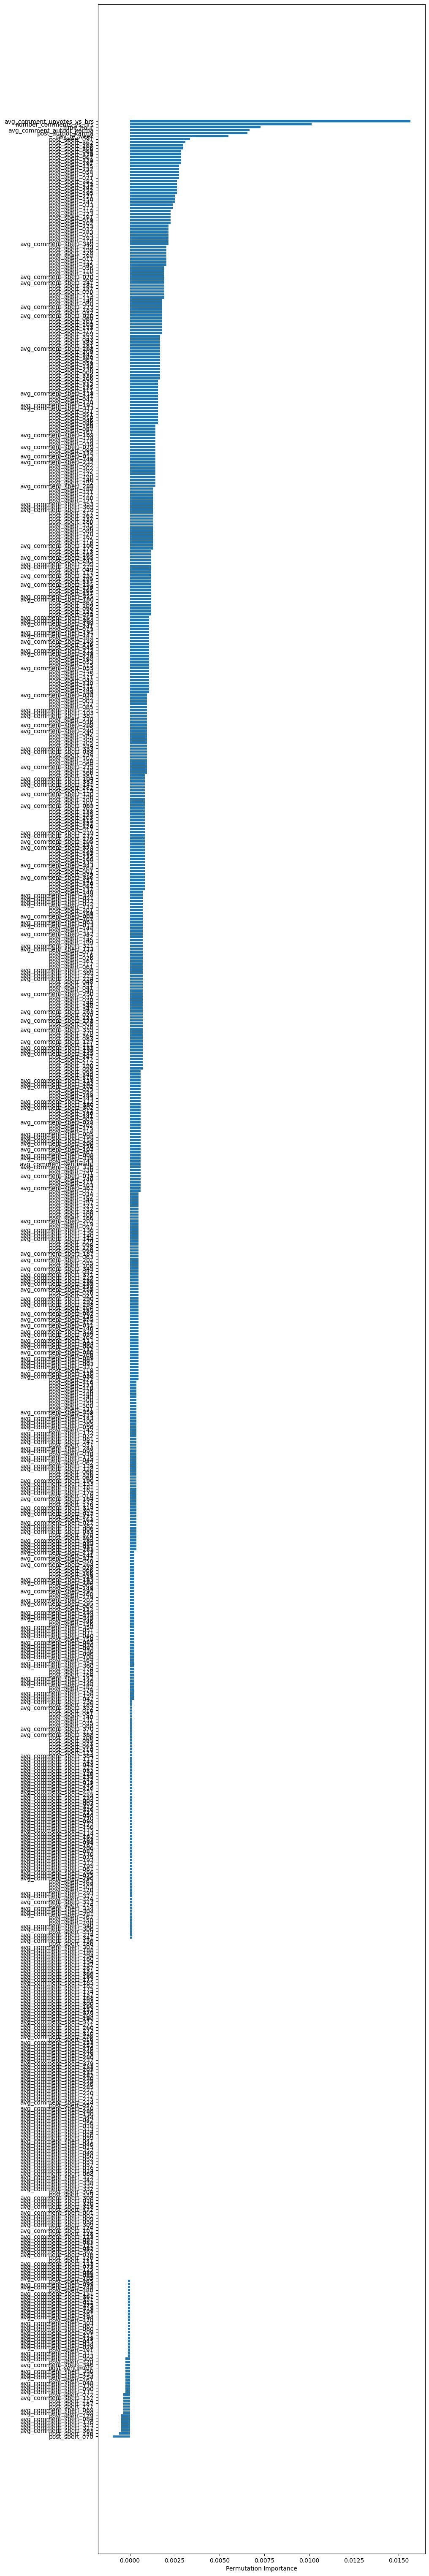

In [25]:
figure(figsize=(10, 80), dpi=100)
plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")
plt.savefig("saved_work/SVC_long_feat_imp.png")

In [12]:
# #recombining features to match labels to features:
# clabels_v2 = list(X_train.columns)
# clabels_v2.remove('time_hour')
# clabels_v2.remove('day_of_week')

# #names of new cols inserted for Day of Week/Hour of day
# HOD_names = list(SVC_loaded['preprocessor'].transformers_[1][1]['onehot'].get_feature_names())

In [14]:
# len(HOD_names)

31

In [15]:
# # In the transformed X array from the pipeline
# slice_di = {'first_three'   : [0:3],
#             'HOD_DOW'       : [3:34],
#             'SBERT_P'       : [34:418],
#             'Middle three'  : [418:421],
#             'SBERT_C'       : [421:806]
#             }